# Logitic regression on ICAN clinical data

**Objective:** implement a logistic regression model with the ICAN clinical data.

## Library importation

In [1]:
library(finalfit)
library(knitr)
library(pls)
library(forestmodel)


Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings


Loading required package: ggplot2



## Data loading

In [2]:
ican <- read.csv("simulated_ican_clinical_data.csv", sep = "#", encoding = "utf8")
ican <- ican[,-dim(ican)[2]]
dim(ican)

[1] 2505   28

In [3]:
adjusted_IA_size_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$adjusted_IA_size[i] < 3) {
        adjusted_IA_size_class[i] <- "<3"
    } else if (ican$adjusted_IA_size[i] >= 3) {
        adjusted_IA_size_class[i] <- ">=3"
    } else {
        adjusted_IA_size_class[i] <- "Other"
    }
}
ican["adjusted_IA_size"] <- as.factor(adjusted_IA_size_class)

In [4]:
age_class <- c()
for (i in 1:dim(ican)[1]) {
    if (ican$age[i] < 50) {
        age_class[i] <- "<50"
    } else if (ican$age[i] < 60) {
        age_class[i] <- "50-59"
    } else if (ican$age[i] < 70) {
        age_class[i] <- "60-69"
    } else if (ican$age[i] >= 70) {
        age_class[i] <- ">=70"
    } else {
        age_class[i] <- "Other"
    }
}
ican["age"] <- as.factor(age_class)

In [5]:
ican$IA_location <- factor(as.character(ican$IA_location), levels = c("ICA", "MCA", "ACA", "PCA"))
ican$packs_year <- factor(as.character(ican$packs_year), levels = c("Non-smoker", "Little_smoker", "Regular_smoker"))
ican$adjusted_IA_size <- factor(as.character(ican$adjusted_IA_size), levels = c("<3", ">=3"))
ican$age <- factor(as.character(ican$age), levels = c("<50", "50-59", "60-69", ">=70"))

## Univariable Logistic Regression

In [6]:
dependent <- "rupture"
explanatory <- colnames(ican[,-dim(ican)[2]])
res_glm_uni <- ican %>%
    glmuni(dependent, explanatory) %>% 
    fit2df(estimate_suffix=" (univariate)")
kable(res_glm_uni,row.names=FALSE, align=c("l", "l", "r", "r", "r", "r"))

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...





|explanatory                            |OR (univariate)           |
|:--------------------------------------|:-------------------------|
|sexM                                   |0.93 (0.78-1.12, p=0.443) |
|age50-59                               |0.99 (0.81-1.20, p=0.890) |
|age60-69                               |0.98 (0.79-1.22, p=0.890) |
|age>=70                                |1.22 (0.90-1.66, p=0.204) |
|bmi                                    |1.00 (0.98-1.02, p=0.863) |
|sporadic_caseYes                       |1.03 (0.84-1.27, p=0.781) |
|multiple_IAYes                         |1.04 (0.87-1.23, p=0.681) |
|IA_locationMCA                         |0.98 (0.78-1.22, p=0.827) |
|IA_locationACA                         |1.04 (0.84-1.29, p=0.731) |
|IA_locationPCA                         |0.97 (0.76-1.25, p=0.829) |
|adjusted_IA_size>=3                    |0.96 (0.81-1.14, p=0.669) |
|packs_yearLittle_smoker                |1.08 (0.89-1.32, p=0.413) |
|packs_yearRegular_smoker       

## Multivariables Logistic Regression

In [7]:
fit1 <- glm(rupture ~ ., data = ican, family = "binomial")
fit0 <- glm(rupture ~ sex + age + adjusted_IA_size + IA_location + hta + packs_year, 
            family = binomial, data = ican)
summary(fit0)


Call:
glm(formula = rupture ~ sex + age + adjusted_IA_size + IA_location + 
    hta + packs_year, family = binomial, data = ican)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1799  -0.9935  -0.9552   1.3489   1.4986  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.53240    0.12834  -4.148 3.35e-05 ***
sexM                     -0.06807    0.09207  -0.739   0.4597    
age50-59                 -0.01577    0.09860  -0.160   0.8729    
age60-69                 -0.01354    0.11036  -0.123   0.9024    
age>=70                   0.18613    0.15764   1.181   0.2377    
adjusted_IA_size>=3      -0.09040    0.11655  -0.776   0.4379    
IA_locationMCA           -0.02269    0.11609  -0.195   0.8450    
IA_locationACA            0.09670    0.13165   0.734   0.4627    
IA_locationPCA            0.03943    0.15250   0.259   0.7960    
htaYes                    0.01973    0.08518   0.232   0.8169    
packs_yearLitt

In [8]:
tmp <- step(fit0, scope = formula(fit1), direction = "forward")

Start:  AIC=3372.94
rupture ~ sex + age + adjusted_IA_size + IA_location + hta + 
    packs_year

                                      Df Deviance    AIC
+ alcohol                              1   3346.6 3372.6
+ pad_history                          1   3346.8 3372.8
+ headaches                            1   3346.8 3372.8
<none>                                     3348.9 3372.9
+ ischemic_stroke_history              1   3347.1 3373.1
+ carotid_artery_stenosis_history      1   3347.2 3373.2
+ dyslipidemia                         1   3347.8 3373.8
+ ischemic_heart_disease_history       1   3348.0 3374.0
+ vka_or_anticoagulant_ttt             1   3348.0 3374.0
+ hormone_therapy_ttt                  1   3348.1 3374.1
+ statin_ttt                           1   3348.2 3374.2
+ platelet_aggregation_inhibiting_ttt  1   3348.4 3374.4
+ asthma                               1   3348.6 3374.6
+ aortic_aneurysm_history              1   3348.7 3374.7
+ multiple_IA                          1   3348

In [9]:
fit <- glm(tmp$call, data = ican, family = "binomial")
summary(fit) 


Call:
glm(formula = tmp$call, family = "binomial", data = ican)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2546  -1.0091  -0.9334   1.3375   1.6788  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -0.60794    0.13235  -4.594 4.36e-06 ***
sexM                       -0.06612    0.09224  -0.717   0.4734    
age50-59                   -0.01676    0.09883  -0.170   0.8654    
age60-69                   -0.01495    0.11059  -0.135   0.8925    
age>=70                     0.19350    0.15794   1.225   0.2205    
adjusted_IA_size>=3        -0.07870    0.11680  -0.674   0.5005    
IA_locationMCA             -0.01383    0.11634  -0.119   0.9054    
IA_locationACA              0.09626    0.13187   0.730   0.4654    
IA_locationPCA              0.04416    0.15285   0.289   0.7726    
htaYes                      0.03638    0.08580   0.424   0.6715    
packs_yearLittle_smoker     0.07905    0.09978   0.792   0

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
"Unable to resize forest panel to be smaller than its heading; consider a smaller text size"
Warning message:
"Ignoring unknown aesthetics: x"


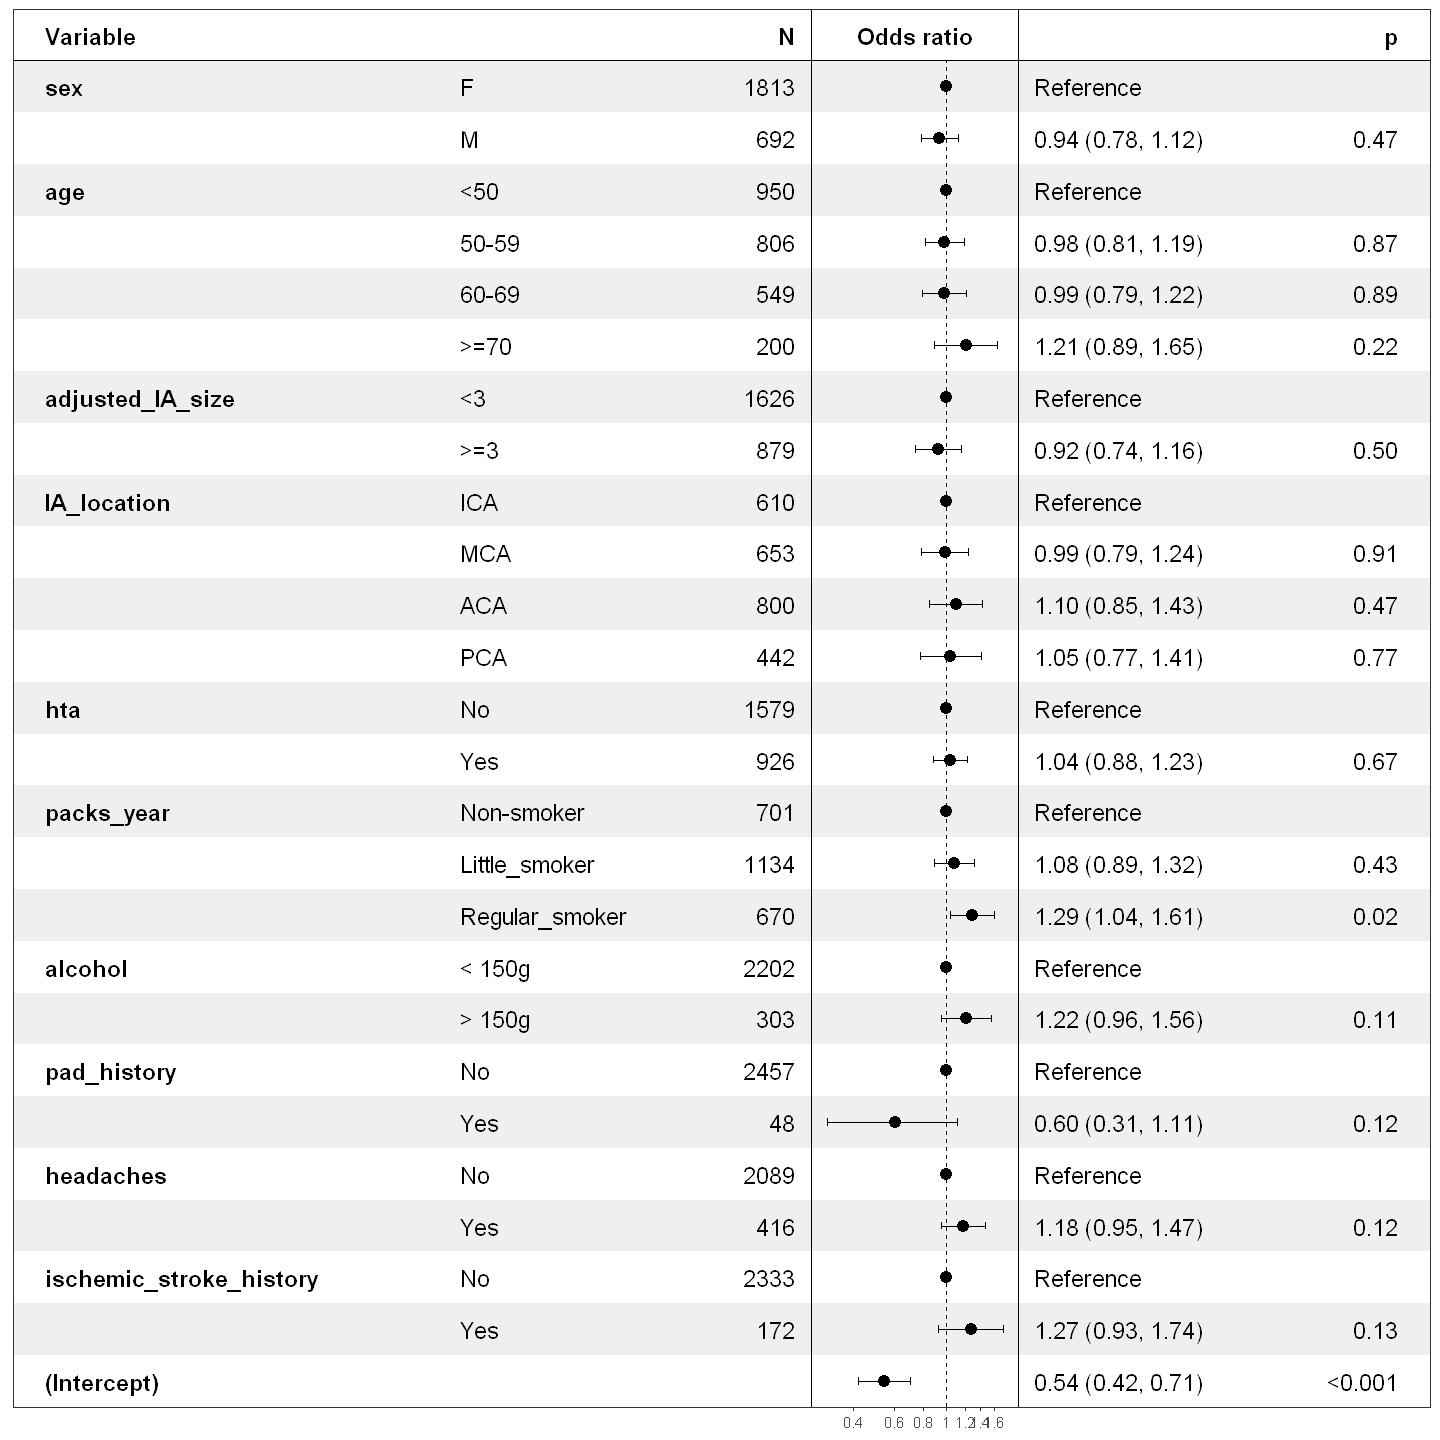

In [10]:
options(repr.plot.width = 12, repr.plot.height = 12)
forest_model(fit, format_options = list(colour = "black", shape = 20, text_size = 5, banded = TRUE))